In [1]:
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
import os
from matplotlib import pyplot as plt

We take ivanovo_dataset and delete all missing values to have full initial dataset

In [2]:
from sklearn.preprocessing import StandardScaler

X_full = np.genfromtxt(os.path.basename('/Desktop/Coursework/July/data_ivanovo.csv') , delimiter=';', skip_header=2)
colnames = ['discr_1', 'discr_2', 'discr_3', 'discr_4', 'discr_5', 'discr_6', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12'] 
cont_colnames = ['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12'] 


df = pd.DataFrame(X_full)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
#df.dropna() 1883/1858
#df

In [3]:
df_cont = df.iloc[:, 6:18]
df_cont

,6,7,8,9,10,11,12,13,14,15,16,17
0,0.681272,0.839077,1.699830,0.780747,1.965416,2.297007,-0.619881,-0.906753,1.710877,1.080780,0.195906,-0.762807
1,1.465668,1.619690,1.556676,2.193946,1.396400,-0.673438,1.092172,-0.193068,0.172220,0.592126,1.120988,0.020496
2,-1.584760,-0.790098,-1.020090,-0.475431,-1.069334,-1.267527,-1.400506,-1.412281,-0.606606,-2.146019,0.000772,1.699002
3,1.117047,1.467215,1.914561,1.304154,1.111892,0.910800,0.045425,0.936935,0.020254,-0.022903,0.058590,-0.091404
4,0.506962,2.299204,1.771407,0.519043,0.732548,-0.574423,1.730865,-1.114912,0.789582,1.266131,-0.136545,1.251401
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,-0.887519,-0.280463,0.339870,-0.789475,-0.595155,-0.178363,0.453479,-0.490437,-0.331168,0.137173,-0.273861,0.468098
1879,-0.713209,-0.280463,-0.053802,-0.946497,-1.164170,-1.366541,0.151873,1.501937,-0.141210,0.389925,-0.729175,0.132397
1880,-0.364589,0.414796,-0.018014,-0.266068,-0.215811,-1.366541,-0.398112,-1.560966,-0.036733,-0.840134,-0.042591,1.475201
1881,-1.148984,-0.756122,-0.161168,-0.475431,-0.026139,0.019666,0.613152,0.520618,0.457157,0.802753,-0.317224,0.132397


Nonzero values in the column [2]

In [4]:
# df[(df[[2]] != 0) =='True'].isnull().values.any()

True

In [5]:
# count = (df[[2]] != 0).sum()
# count

2    321
dtype: int64

In [6]:
# df.isnull().values.any()

False

Correlation in data

In [63]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,-0.416733,0.002848,-0.040954,0.113003,-0.003299,0.230600,0.068610,-0.217655,0.003396,-0.044236,0.118551,0.070265,0.341607,-0.101479,0.140208,-0.036389,-0.474928
1,-0.416733,1.000000,-0.019417,-0.049777,-0.079674,0.002793,-0.216651,-0.065687,0.076130,-0.028016,0.018924,-0.025810,-0.051295,-0.177529,0.099529,-0.082244,0.004427,0.190613
2,0.002848,-0.019417,1.000000,0.006811,-0.018205,-0.056055,0.003411,0.056873,0.022708,0.069442,0.079712,-0.003578,0.089754,0.059036,-0.004235,-0.001187,-0.046372,0.003364
3,-0.040954,-0.049777,0.006811,1.000000,-0.084489,-0.019377,-0.120336,-0.131044,-0.136686,-0.096858,-0.075859,-0.054507,-0.044920,0.035691,-0.064441,-0.067940,-0.040964,-0.041468
4,0.113003,-0.079674,-0.018205,-0.084489,1.000000,0.268948,0.450058,0.322645,0.335007,0.400309,0.355654,0.070777,0.144361,-0.074100,0.191973,0.180190,0.194627,0.128632
5,-0.003299,0.002793,-0.056055,-0.019377,0.268948,1.000000,0.194269,0.099557,0.118859,0.069484,0.059914,-0.021242,-0.014666,-0.033500,0.101991,0.017317,0.112762,0.045092
6,0.230600,-0.216651,0.003411,-0.120336,0.450058,0.194269,1.000000,0.382237,0.374438,0.427674,0.389335,0.078027,0.270943,0.036506,0.208591,0.357668,0.227889,-0.012598
7,0.068610,-0.065687,0.056873,-0.131044,0.322645,0.099557,0.382237,1.000000,0.819511,0.463341,0.422108,0.141224,0.212259,-0.222842,0.286739,0.194579,0.246950,0.302332
8,-0.217655,0.076130,0.022708,-0.136686,0.335007,0.118859,0.374438,0.819511,1.000000,0.493035,0.462493,0.149331,0.188395,-0.333780,0.366164,0.193523,0.284792,0.430566
9,0.003396,-0.028016,0.069442,-0.096858,0.400309,0.069484,0.427674,0.463341,0.493035,1.000000,0.802498,0.222252,0.238637,-0.120724,0.263525,0.248213,0.261403,0.226980


In [ ]:
# corr_pairs_flat_miss, sort_idxs_miss, names = sorted_corr_pairs(X_miss.corr())

In [77]:
# def sorted_corr_pairs(corr_df):
#     corr_pairs = []
#     indxs = []
#     col_names = []
#     for idx, col in enumerate(df.columns):
#         corr_line = corr_df[df.columns[df.columns != col]].loc[col]
#         corr_pairs.append(corr_line)
#         col_names.append([str(col) + '-' + str(col_i) for col_i in df.columns[df.columns != col]])

    
#     corr_pairs_flat = np.array(corr_pairs).flatten()
    
#     sort_idxs = np.argsort(corr_pairs_flat)
 
#     col_names = np.array(col_names).flatten()
#     return corr_pairs_flat, sort_idxs[::2], col_names

In [78]:
# corr_pairs_flat_miss, sort_idxs_miss, names = sorted_corr_pairs(df.corr())

In [83]:
# plt.figure(figsize=(20, 10))
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ax.bar(x=colnames[sort_idxs_miss],height=corr_pairs_flat[sort_idxs])
# ax.bar(x=colnames[sort_idxs_miss],height=corr_pairs_flat_miss[sort_idxs], alpha=0.7)
# # ax.grid(which='major')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
# plt.xticks(rotation=90);
# plt.ylim(-0.8)
# # plt.xticks(col_names[sort_idxs][::2]);
# plt.savefig(f"figures_ivanovo/sorted_correlated_amputed_{p_mech}_{p_miss}.png", dpi=200)

In [12]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<!-- ///CC, analysis by column [17] (very last continuous col). we vary ampute proportion

///missing_patterns: [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1] --> -->
<!-- 
CC, analysis by column [11] (very last col without mis values in contin data). we vary ampute proportion -->

In [4]:
def ivanovo_test(param, num, varss):    
    df_ivanovo = df_cont.to_numpy()
    proportion = np.arange(0.1, 1, 0.1)

    df_bias_cc = pd.DataFrame(columns = ['full', 'MCAR', 'MAR', 'MNAR'])

    for pr in proportion:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_MCAR', 'mean_MAR', 'mean_MNAR'])

        for n in np.arange(100):

            X_full = df_ivanovo
            df_means.loc[n, 'mean_full'] = X_full[:, num].mean() 

            #___MCAR________

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'mechanism': "MCAR"} ],
                prop = pr
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = cont_colnames)
            cc = X_m.dropna()
            df_means.loc[n, 'mean_MCAR'] = cc[param].mean() 


            #___MAR________

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'mechanism': "MAR"} ], 
                #by default weights for not amputed variables = 1, for amputed = 0, like 'weights': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
                prop = pr
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = cont_colnames)
            cc = X_m.dropna()
            df_means.loc[n, 'mean_MAR'] = cc[param].mean() 


            #___MNAR________

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'mechanism': "MNAR"} ],
                prop = pr
            )
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = cont_colnames)
            cc = X_m.dropna()
            df_means.loc[n, 'mean_MNAR'] = cc[param].mean() 


        df_bias_cc.loc[pr, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias_cc.loc[pr, 'MCAR'] = df_means['mean_MCAR'].mean() - df_means['mean_full'].mean()
        df_bias_cc.loc[pr, 'MAR'] = df_means['mean_MAR'].mean() - df_means['mean_full'].mean()
        df_bias_cc.loc[pr, 'MNAR'] = df_means['mean_MNAR'].mean() - df_means['mean_full'].mean()


    return df_bias_cc

CC, analysis by column [11] (very last col without mis values in contin data). we vary ampute proportion

one variable without mis values: cont_12 [11], analysis by it

(for dataset with descrete values same graphic)

<AxesSubplot:>

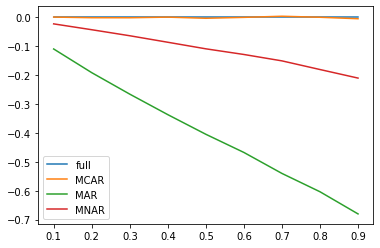

In [5]:
test1_by12 = ivanovo_test(param = 'cont_12', num = 11, varss = np.arange(0, 11, 1))
test1_by12.plot()

Потеря по MAR зависит только от 'cont_12', поэтому среднее по переменной 'cont_12' станет меньше относительно исходного. График движется вниз, тк по оси x отложен prop!!, не cor. => очевидно и правильно, что bias растет при увеличении количеcтва потерянных данных.

Кривая MNAR находится выше MAR, тк вклад в wss вносят сразу все 0,1,..,9,10 переменные, а выбиваем в итоге строки с наибольшими суммами. Слишком от многих переменных зависимость => при маленьких cor значения в [11] выбиваются почти случайно, в итоге в среднем отличие среднего от исходного небольшое.

one variable without mis values: cont_12 [11], analysis by [10]  

<AxesSubplot:>

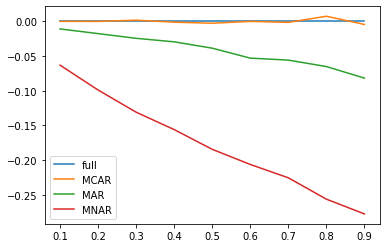

In [7]:
test1_by11 = ivanovo_test(param = 'cont_11', num = 10, varss = np.arange(0, 11, 1))
test1_by11.plot()

<AxesSubplot:>

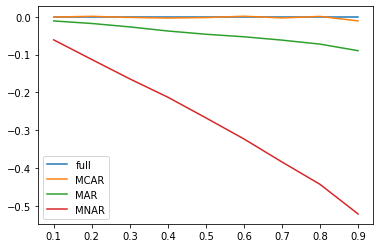

In [8]:
test1_by10 = ivanovo_test(param = 'cont_10', num = 9, varss = np.arange(0, 11, 1))
test1_by10.plot()

По cont_11 bias < -0.25, по cont_10 < -0.5. Исследрвать! корреляцию параметров cont_10, cont_11, cont_12

Меняем паттерн потери: [ 0,  1,  2,  3,    5,  6,  7,  8,  9, 10, 11] // Пусть стб. 4 без потерянныз данных

<AxesSubplot:>

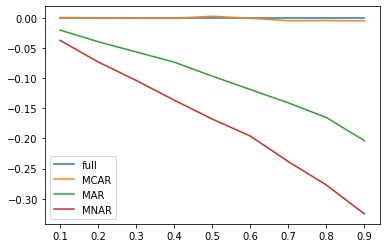

In [13]:
test2_by12 = ivanovo_test(param = 'cont_12', num = 11, varss = [ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11])
test2_by12.plot()

CC, analysis by column [11]  

MNAR 'weights': [0,0,0,0,0,0,1,0,0,0,0,0]

In [59]:
df_ivanovo = df_cont.to_numpy()
proportion = np.arange(0.1, 1, 0.1)

df_bias_cc = pd.DataFrame(columns = ['full', 'MCAR', 'MAR', 'MNAR'])

for pr in proportion:
    
    n = 0
    df_means = pd.DataFrame(columns = ['mean_full', 'mean_MCAR', 'mean_MAR', 'mean_MNAR'])

    for n in np.arange(100):

        X_full = df_ivanovo
        df_means.loc[n, 'mean_full'] = X_full[:,11].mean() 

        #___MCAR________
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': np.arange(0, 11, 1), 'mechanism': "MCAR"} ],
            prop = pr
        )
        X_miss = ma.fit_transform(X_full)

        X_m = pd.DataFrame(X_miss, columns = cont_colnames)
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MCAR'] = cc['cont_12'].mean() 


        #___MAR________
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': np.arange(0, 11, 1), 'mechanism': "MAR"} ], 
            #by default weights for not amputed variables = 1, for amputed = 0, like 'weights': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
            prop = pr
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = cont_colnames)
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR'] = cc['cont_12'].mean() 

        
        #___MNAR________
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': np.arange(0, 11, 1), 'weights': [0,0,0,0,0,0,1,0,0,0,0,0], 'mechanism': "MAR+MNAR"} ],
            prop = pr
        )
        X_miss = ma.fit_transform(X_full)
        X_m = pd.DataFrame(X_miss, columns = cont_colnames)
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MNAR'] = cc['cont_12'].mean() 

        
    df_bias_cc.loc[pr, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
    df_bias_cc.loc[pr, 'MCAR'] = df_means['mean_MCAR'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[pr, 'MAR'] = df_means['mean_MAR'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[pr, 'MNAR'] = df_means['mean_MNAR'].mean() - df_means['mean_full'].mean()

    
df_bias_cc

,full,MCAR,MAR,MNAR
0.1,0.0,-0.000137,-0.11063,-0.0109
0.2,0.0,0.000834,-0.190551,-0.019988
0.3,0.0,0.001001,-0.264853,-0.026978
0.4,0.0,-0.001488,-0.334399,-0.035637
0.5,0.0,0.004172,-0.4047,-0.040582
0.6,0.0,0.003683,-0.467036,-0.050151
0.7,0.0,0.004858,-0.540178,-0.06707
0.8,0.0,0.002136,-0.606605,-0.060843
0.9,0.0,-0.003917,-0.684623,-0.077128


<AxesSubplot:>

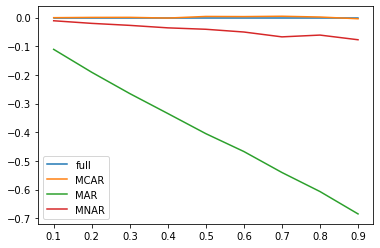

In [60]:
df_bias_cc.plot()

As ampute data we take ivanovo dataset with missing values

In [ ]:
# propor = 0.2
# corrs = np.arange(0.1, 1, 0.1)

# df_bias_cc = pd.DataFrame(columns = ['full', 'MCAR', 'MAR', 'MNAR'])

# for cor in corrs:
    
#     n = 0
#     df_means = pd.DataFrame(columns = ['mean_full', 'mean_MCAR', 'mean_MAR', 'mean_MNAR'])

#     for n in np.arange(100):

#         X_full = df_ivanovo
#         df_means.loc[n, 'mean_full'] = X_full[:,0].mean() 

#         #___MCAR________
        
#         ma = MultivariateAmputation(
#             patterns = [ {'incomplete_vars': np.arange(0, 17, 1), 'mechanism': "MCAR"} ],
#             prop = propor
#         )
#         X_miss = ma.fit_transform(X_full)

#         X_m = pd.DataFrame(X_miss, columns = colnames)
#         cc = X_m.dropna()
#         df_means.loc[n, 'mean_MCAR'] = cc['cont_1'].mean() 


#         #___MAR________
        
#         ma = MultivariateAmputation(
#             patterns = [ {'incomplete_vars': np.arange(0, 17, 1), 'weights': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1], 'mechanism': "MAR"} ],
#             prop = propor
#         )
#         X_miss = ma.fit_transform(X_full)
        
#         X_m = pd.DataFrame(X_miss, colnames)
#         cc = X_m.dropna()
#         df_means.loc[n, 'mean_MAR'] = cc['cont_1'].mean() 

        
#         #___MNAR________
        
#         ma = MultivariateAmputation(
#             patterns = [ {'incomplete_vars': np.arange(0, 17, 1), 'weights': [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 'mechanism': "MAR+MNAR"} ],
#             prop = propor
#         )
#         X_miss = ma.fit_transform(X_full)
#         X_m = pd.DataFrame(X_miss, columns = colnames)
#         cc = X_m.dropna()
#         df_means.loc[n, 'mean_MNAR'] = cc['cont_1'].mean() 

        
#     df_bias_cc.loc[cor*10, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
#     df_bias_cc.loc[cor*10, 'MCAR'] = df_means['mean_MCAR'].mean() - df_means['mean_full'].mean()
#     df_bias_cc.loc[cor*10, 'MAR'] = df_means['mean_MAR'].mean() - df_means['mean_full'].mean()
#     df_bias_cc.loc[cor*10, 'MNAR'] = df_means['mean_MNAR'].mean() - df_means['mean_full'].mean()

    
# df_bias_cc